### **977.有序数组的平方**

给你一个按 非递减顺序 排序的整数数组 nums，返回 每个数字的平方 组成的新数组，要求也按 非递减顺序 排序。

示例 1：

- 输入：nums = [-4,-1,0,3,10]
- 输出：[0,1,9,16,100]
- 解释：平方后，数组变为 [16,1,0,9,100]，排序后，数组变为 [0,1,9,16,100]

示例 2：

- 输入：nums = [-7,-3,2,3,11]
- 输出：[4,9,9,49,121]

In [ ]:
## 暴力法， 直接平方在sort
直接平方，复杂度 O(n)
sort: 复杂度 (nlogn)
整体 O(n + nlogn) = O(nlogn)

## 左右指针 + 结果指针法




In [2]:
from typing import List

class Solution:
    def sortedSquares(self, nums: List[int]) -> List[int]:
        left_index = 0
        right_index = len(nums) - 1 # 注意用len要-1才行
        result_index = len(nums) - 1 # 从大到小
        result = [float('inf')] * len(nums)

        while left_index <= right_index:
            left_value_squared = nums[left_index] ** 2
            right_value_squared = nums[right_index] ** 2
            if left_value_squared < right_value_squared:
                result[result_index] = right_value_squared
                right_index -= 1
            elif left_value_squared == right_value_squared:
                result[result_index] = right_value_squared
                right_index -= 1
            else:
                result[result_index] = left_value_squared
                left_index += 1
            result_index -= 1

        return result

In [ ]:
# 性能优化

class Solution:
    def sortedSquares(self, nums: List[int]) -> List[int]:

        # 提前判断最小值正负，可以避免双指针的遍历过程，从而提升性能。
        if nums[0] >= 0:  # 全为非负数
            return [num ** 2 for num in nums]
        if nums[-1] <= 0:  # 全为非正数
            return [num ** 2 for num in reversed(nums)]

        left_index = 0
        right_index = len(nums) - 1 # 注意用len要-1才行
        result_index = len(nums) - 1 # 从大到小

        # inf 略微浪费初始化的时间和内存。可以直接初始化为 [0] * len(nums)
        result = [0] * len(nums)

        while left_index <= right_index:
            left_value_squared = nums[left_index] ** 2
            right_value_squared = nums[right_index] ** 2
            if left_value_squared <= right_value_squared:
                result[result_index] = right_value_squared
                right_index -= 1
            else:
                result[result_index] = left_value_squared
                left_index += 1
            result_index -= 1

        return result
            


## 知识点

right_index = len(nums) - 1 # 注意用len要-1才行

result = [float('inf')] * len(nums) # 注意这个用法

result_index -= 1 # 不要忘了移动结果的指针

可以分三类讨论，大于小于等于，其中等于其实放到哪类都可以，但是分类讨论容易想清楚


In [5]:
def test_sortedSquares():
    solution = Solution()
    
    # 测试用例列表
    test_cases = [
        {"nums": [-4, -1, 0, 3, 10], "expected": [0, 1, 9, 16, 100]},
        {"nums": [-7, -3, 2, 3, 11], "expected": [4, 9, 9, 49, 121]},
        {"nums": [-1], "expected": [1]},
        {"nums": [0, 1, 2, 3], "expected": [0, 1, 4, 9]},
        {"nums": [], "expected": []},  # 边界情况：空数组
        {"nums": [-5, -3, -1], "expected": [1, 9, 25]}  # 全部为负数的数组
    ]

    # 运行测试
    for i, case in enumerate(test_cases):
        nums = case["nums"]
        expected = case["expected"]
        result = solution.sortedSquares(nums)
        
        assert result == expected, f"Test case {i+1} failed: Input {nums}, Expected {expected}, Got {result}"
        print(f"Test case {i+1} passed!")

# 运行测试
test_sortedSquares()

Test case 1 passed!
Test case 2 passed!
Test case 3 passed!
Test case 4 passed!
Test case 5 passed!
Test case 6 passed!


# 209. 长度最小的子数组

给定一个含有 n 个正整数的数组和一个正整数 target 。

找出该数组中满足其总和大于等于 target 的长度最小的 
子数组
 [numsl, numsl+1, ..., numsr-1, numsr] ，并返回其长度。如果不存在符合条件的子数组，返回 0 。

 

示例 1：

输入：target = 7, nums = [2,3,1,2,4,3]
输出：2
解释：子数组 [4,3] 是该条件下的长度最小的子数组。
示例 2：

输入：target = 4, nums = [1,4,4]
输出：1
示例 3：

输入：target = 11, nums = [1,1,1,1,1,1,1,1]
输出：0
 

提示：

1 <= target <= 109
1 <= nums.length <= 105
1 <= nums[i] <= 104
 

进阶：

如果你已经实现 O(n) 时间复杂度的解法, 请尝试设计一个 O(n log(n)) 时间复杂度的解法。

理解： 

就相当于前指针排除了很多无用的branch
target : 100

```

1, 1, 1, 100
^  *  ->


1, 1, 1, 100
^   ->    *

满足条件 103，开始向前移动前指针 

1, 1, 1, 100
   ^  ->  *

1, 1, 1, 100
      ^ ->*

核心的误区： 考虑太多太长数列的问题

这个数列可能很长，但是如果我们已经能找到很小的区间，那么就不用再看后边的了
所以滑动窗口可以

```

### **关键点总结**
1. **滑动窗口的本质**：
   - 动态调整区间 `[l, r]` 的大小，通过不断扩展和收缩窗口找到满足条件的解。

2. **优化搜索**：
   - 当窗口内的总和已经满足条件时，立即尝试收缩窗口，避免浪费时间继续扩大区间。

3. **边界处理**：
   - 如果 `min_length` 没有被更新过，说明没有满足条件的子数组，返回 `0`。

通过滑动窗口，你只需遍历一次数组，时间复杂度为 \(O(n)\)，适用于长度较大的数组。你的理解是对的，这个方法有效地避免了冗余的计算路径。

In [7]:
class Solution:
    def minSubArrayLen(self, target: int, nums: List[int]) -> int:
        # 滑动窗口
        l = 0
        r = 0
        sum = 0
        result = float("inf")  # 记录结果list的长度

        for r in range(len(nums)):  # 注意range是从 0 到 len() - 1
            sum += nums[r]

            while sum >= target:  # 条件还不满足
                current_length = r - l + 1  # 更新list长度
                result = min(result, current_length)  # 记录最小的
                sum -= nums[l]  # 因为缩小了，要减去
                l += 1  # 向左移动左指针

        if result == float("inf"):
            return 0
        else:
            return result


In [8]:
def test_minSubArrayLen():
    solution = Solution()
    
    # 测试用例列表
    test_cases = [
        {"target": 7, "nums": [2, 3, 1, 2, 4, 3], "expected": 2},  # 子数组 [4, 3]
        {"target": 4, "nums": [1, 4, 4], "expected": 1},           # 子数组 [4]
        {"target": 11, "nums": [1, 1, 1, 1, 1, 1, 1, 1], "expected": 0},  # 无子数组满足条件
        {"target": 15, "nums": [1, 2, 3, 4, 5], "expected": 5},    # 子数组 [1, 2, 3, 4, 5]
        {"target": 100, "nums": [50, 50], "expected": 2},          # 子数组 [50, 50]
        {"target": 1, "nums": [], "expected": 0},                  # 空数组
        {"target": 1, "nums": [1], "expected": 1},                 # 单个元素满足条件
    ]

    # 运行测试
    for i, case in enumerate(test_cases):
        target = case["target"]
        nums = case["nums"]
        expected = case["expected"]
        
        result = solution.minSubArrayLen(target, nums)
        assert result == expected, f"Test case {i+1} failed: Input target={target}, nums={nums}, Expected {expected}, Got {result}"
        print(f"Test case {i+1} passed!")

# 运行测试
test_minSubArrayLen()


Test case 1 passed!
Test case 2 passed!
Test case 3 passed!
Test case 4 passed!
Test case 5 passed!
Test case 6 passed!
Test case 7 passed!


### **59.螺旋矩阵II**

给定一个正整数 n，生成一个包含 1 到 n^2 所有元素，且元素按顺时针顺序螺旋排列的正方形矩阵。

示例:

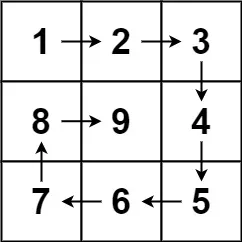

输入: 3 输出: [ [ 1, 2, 3 ], [ 8, 9, 4 ], [ 7, 6, 5 ] ]

**题目建议**：  本题关键还是在转圈的逻辑，在二分搜索中提到的区间定义，在这里又用上了。

题目链接：https://leetcode.cn/problems/spiral-matrix-ii/

文章讲解：https://programmercarl.com/0059.%E8%9E%BA%E6%97%8B%E7%9F%A9%E9%98%B5II.html

视频讲解：https://www.bilibili.com/video/BV1SL4y1N7mV/

In [60]:
class Solution:
    def generateMatrix(self, n: int) -> List[List[int]]:
        # 初始化
        # 这种是浅拷贝
        # result = [[0] * n] * n
        # 这种才对
        result = [[0] * n for _ in range(n)]

        # 一定要注意这里的方向，我们最早的方向是右，
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        current_coord = (0,0)
        visited = set()
        direction_index = 0

        for i in range(1, n*n+1):

            x, y = current_coord # 记住这种用法

            result[x][y] = i
            visited.add(current_coord)

            # 计算下一步坐标
            next_x = x + directions[direction_index][0]
            next_y = y + directions[direction_index][1]
            next_coord = (next_x, next_y)

            if not (0 <= next_x < n and 0 <= next_y < n) or next_coord in visited: # 如果越界， 或已经到达，改变方向
                direction_index = (direction_index + 1) % 4
                # 重新计算改变方向后的坐标
                next_x = x + directions[direction_index][0]
                next_y = y + directions[direction_index][1]
                next_coord = (next_x, next_y)
            
            current_coord = next_coord

        return result
        

## 知识点： 在数学和编程中，以 \((row, column)\) 的顺序理解坐标

- **编程中的数组坐标表示**：
  - 在二维数组或矩阵中，通常用 **行优先** 的表示方式：
    - 第一维（索引 \(0\)）表示 **行**（row）。
    - 第二维（索引 \(1\)）表示 **列**（column）。
  - 因此，\((row, column)\) 的顺序是 **行在前，列在后**。

这意味着在编程中，如果你定义方向向量，应以 \((row, column)\) 的顺序理解。

- **数学常规表示（笛卡尔坐标系）**：
  - 横轴为 \(x\)，纵轴为 \(y\)，通常描述二维平面上的点 \((x, y)\)。
  - 例如，点 \((1, 2)\) 表示 \(x=1\) 和 \(y=2\)。

---

### 在螺旋矩阵中的表示方式

编程中，二维数组的表示一般是以行优先的方式进行，因此：

1. **矩阵表示为 \((row, column)\)**：
   - \(row\) 是数组的第一维度，代表第几行。
   - \(column\) 是数组的第二维度，代表第几列。

2. **方向向量的意义**：
   - \((0, 1)\)：表示在当前行保持不变，列索引加 1，即 **向右移动**。
   - \((1, 0)\)：表示行索引加 1，列保持不变，即 **向下移动**。
   - \((0, -1)\)：表示行保持不变，列索引减 1，即 **向左移动**。
   - \((-1, 0)\)：表示行索引减 1，列保持不变，即 **向上移动**。

3. **螺旋方向顺序**：
   - 顺时针方向依次为 **右、下、左、上**，即：
     - **右**：\((0, 1)\)
     - **下**：\((1, 0)\)
     - **左**：\((0, -1)\)
     - **上**：\((-1, 0)\)

---

### 改为列优先的方式

如果你希望将 **列为 \(x\)，行为 \(y\)**，即按照笛卡尔坐标系的习惯来理解方向，可以调整方向向量，同时在访问矩阵时也需要调换索引。

1. **方向向量调整**：
   - **右**：\((1, 0)\) （列增加，行不变）
   - **下**：\((0, 1)\) （行增加，列不变）
   - **左**：\((-1, 0)\) （列减少，行不变）
   - **上**：\((0, -1)\) （行减少，列不变）

2. **矩阵访问调整**：
   - 访问矩阵元素时，将 **列作为第一维**，**行作为第二维**。
   - 在代码中，需要将 `result[row][col]` 改为 `result[col][row]`。


In [68]:
# 笛卡尔坐标

from typing import List

class Solution:
    def generateMatrix(self, n: int) -> List[List[int]]:
        # 初始化矩阵
        result = [[0] * n for _ in range(n)]

        # 按列优先顺序：右（列增）、下（行增）、左（列减）、上（行减）
        directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]
        current_coord = (0, 0)  # 初始坐标 (x, y)
        direction_index = 0  # 当前方向索引

        for i in range(1, n * n + 1):
            x, y = current_coord  # 当前坐标
            result[y][x] = i  # 注意行列顺序与列优先一致

            # 计算下一步坐标
            next_x = x + directions[direction_index][0]
            next_y = y + directions[direction_index][1]

            # 如果越界或下一位置已填充，切换方向
            if not (0 <= next_x < n and 0 <= next_y < n) or result[next_y][next_x] != 0:
                direction_index = (direction_index + 1) % 4  # 顺时针切换方向
                next_x = x + directions[direction_index][0]
                next_y = y + directions[direction_index][1]

            # 更新当前坐标
            current_coord = (next_x, next_y)

        return result


In [69]:
def test_generateMatrix():
    solution = Solution()
    
    # 测试用例列表
    test_cases = [
        {"n": 3, "expected": [[1, 2, 3], [8, 9, 4], [7, 6, 5]]},
        {"n": 1, "expected": [[1]]},
        {"n": 2, "expected": [[1, 2], [4, 3]]},
        {"n": 4, "expected": [[1, 2, 3, 4], [12, 13, 14, 5], [11, 16, 15, 6], [10, 9, 8, 7]]},
    ]

    # 运行测试
    for i, case in enumerate(test_cases):
        n = case["n"]
        expected = case["expected"]
        
        result = solution.generateMatrix(n)
        assert result == expected, f"Test case {i+1} failed: Input n={n}, Expected {expected}, Got {result}"
        print(f"Test case {i+1} passed!")

# 运行测试
test_generateMatrix()


Test case 1 passed!
Test case 2 passed!
Test case 3 passed!
Test case 4 passed!


In [70]:
# 方法2，用offset跟踪，而不是边界条件
# 按照一圈一圈的方式loop每一行每一列
# 每圈起始点都会向右下角移动(1,1)


class Solution:
    def generateMatrix_offset(self, n: int) -> List[List[int]]:
        nums = [[0] * n for _ in range(n)]
        startx, starty = 0, 0               # 起始点
        loop, mid = n // 2, n // 2          # 迭代次数、n为奇数时，矩阵的中心点
        count = 1                           # 计数

        for offset in range(1, loop + 1) :      # 每循环一层偏移量加1，偏移量从1开始
            for i in range(starty, n - offset) :    # 从左至右，左闭右开
                nums[startx][i] = count
                count += 1
            for i in range(startx, n - offset) :    # 从上至下
                nums[i][n - offset] = count
                count += 1
            for i in range(n - offset, starty, -1) : # 从右至左
                nums[n - offset][i] = count
                count += 1
            for i in range(n - offset, startx, -1) : # 从下至上
                nums[i][starty] = count
                count += 1                
            startx += 1         # 更新起始点, 关注到每圈起始点
            starty += 1

        if n % 2 != 0 :			# n为奇数时，填充中心点
            nums[mid][mid] = count 
        return nums

In [71]:
def test_generateMatrix_offset():
    solution = Solution()
    
    # 测试用例列表
    test_cases = [
        {"n": 3, "expected": [[1, 2, 3], [8, 9, 4], [7, 6, 5]]},
        {"n": 1, "expected": [[1]]},
        {"n": 2, "expected": [[1, 2], [4, 3]]},
        {"n": 4, "expected": [[1, 2, 3, 4], [12, 13, 14, 5], [11, 16, 15, 6], [10, 9, 8, 7]]},
    ]

    # 运行测试
    for i, case in enumerate(test_cases):
        n = case["n"]
        expected = case["expected"]
        
        result = solution.generateMatrix_offset(n)
        assert result == expected, f"Test case {i+1} failed: Input n={n}, Expected {expected}, Got {result}"
        print(f"Test case {i+1} passed!")

# 运行测试

test_generateMatrix_offset()


Test case 1 passed!
Test case 2 passed!
Test case 3 passed!
Test case 4 passed!
